# Clase 9 - Análisis Exploratorio de Datos (EDA)

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**



## Objetivos de la Clase

![Etapas de un Proyecto de Ciencia de Datos](https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/13-EDA/metodologia.png)

Los datos son la materia prima para la contrucción de análisis estadísticos y modelos predictivos. Esto implica que las hipótesis y predicciones elaboradas por dichos modelos estarán directamente relacionados con la calidad de los datos. Por ende, es crítico asegurar un preprocesado y una buena examinación de los datasets a trabajar.

El contenido de esta cátedra, se centra en las técnicas esenciales para la **exploración de datos** usando las herramientas que hemos visto hasta el momento.


## Problema de Esta Clase: House Pricing

![House Pricing](https://www.kaggle.com/competitions/5407/images/header)

El dataset **`house pricing`** consiste en 80 variables (79 variables explicativas más una variable objetivo) que describen aspectos fundamentales de hogares residenciales en la ciudad de _Ames, Iowa_.

El objetivo de esta clase será **caracterizar y entender la relación entre las variables** para el posterior modelamiento de la variable `SalePrice` (precio de la vivienda).

Es un problema "ultra conocido"y pueden encontrar su descripción aquí: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items # para graficar scatter matrix
from scipy import stats
from scipy.stats import norm

# El conjunto a trabajar es el de entrenamiento
df = pd.read_csv(
    "https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/13-EDA//train.csv",
    index_col="Id",
)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Comencemos primero por hacer un poco de preprocesamiento a los datos:

In [3]:
# Preprocesamiento

# Etapa 1: Convertir mes y año a Datetime
df["DateSold"] = pd.to_datetime(
    "1/" + df["MoSold"].astype(str) + "/" + df["YearBuilt"].astype(str), yearfirst=False
)

# Etapa 2: Generar cuartiles para los precios
df["SalePriceQCut"] = pd.qcut(
    df["SalePrice"], 4, ["Low", "Low-Mid", "Mid-High", "High"]
)

# Etapa 3: Convertir strings a categorías
df = pd.concat(
    [
        df.select_dtypes([], ["object"]),
        df.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Luego, seleccionamos sólo las variables de interés:

In [4]:
df = df.loc[
    :,
    [
        # Terreno 🏔️
        "LotArea",  # Area del terreno
        "LandSlope",  # Pendiente del terreno
        "Neighborhood",  # Barrio

        # Metadatos de la Vivienda 📆
        "BldgType",  # Tipo de vivienda
        "YearBuilt",  # Año de construcción
        "YearRemodAdd",  # Año de remodelación
        "Utilities",  # Agua, luz, etc...

        # Materiales 🧱
        "Foundation",  # Fundación de la vivienda
        "RoofMatl",  # Material del techo
        "RoofStyle",  # Estilo del techo
        "Exterior1st",  # Material del Exterior
        "ExterCond",  # Condición del material exterior

        # Interior de la casa 🏡
        "GrLivArea",  # Area habitable sobre el nivel del suelo.
        "1stFlrSF",  # Area primer piso
        "2ndFlrSF",  # Area segundo piso
        "FullBath",  # Baños completos
        "HalfBath",  # Medios baños, baños sin tina.
        "BedroomAbvGr",  # Piezas
        "KitchenAbvGr",  # Cocinas
        "KitchenQual",  # Calidad de la cocina

        # Sótano 🪨
        "TotalBsmtSF",  # Total sótano
        "BsmtCond",  # Condición del sótano

        # Garaje 🚗
        "GarageType",  # Tipo de garaje
        "GarageCars",  # Cantidad de autos por garaje

        # Piscina 🤽‍♂️
        "PoolArea",  # Area de la piscina
        "PoolQC",  # Calidad de la piscina

        # Calefacción y Aire 🌦️
        "Heating",  # Calefacción
        "HeatingQC",  # Calidad de la Calefacción
        "CentralAir",  # Aire Acondicionado Central

        # Calidad y Condición 🌟
        "OverallQual",  # Calidad general
        "OverallCond",  # Condición general actual
        
        # Datos de la venta  💵
        "DateSold",  # Mes y Año de venta
        "SaleType",  # Tipo de venta
        "SaleCondition",  # Condición de la vivienda en la venta
        "SalePrice",  # Precio de la venta
        "SalePriceQCut",  # Cuartiles del precio de la vivienda
    ],
]

> **Pregunta ❓**: ¿De qué otra manera podríamos haber filtrado las variables?

Podemos distinguir las columnas tipo de dato:

In [5]:
numeric = df.select_dtypes(["int64"]).columns
categorical = df.select_dtypes(["category"]).columns

> **Pregunta ❓**: ¿Qué otra aplicación podría tener el método `select_dtypes`?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LotArea        1460 non-null   int64         
 1   LandSlope      1460 non-null   category      
 2   Neighborhood   1460 non-null   category      
 3   BldgType       1460 non-null   category      
 4   YearBuilt      1460 non-null   int64         
 5   YearRemodAdd   1460 non-null   int64         
 6   Utilities      1460 non-null   category      
 7   Foundation     1460 non-null   category      
 8   RoofMatl       1460 non-null   category      
 9   RoofStyle      1460 non-null   category      
 10  Exterior1st    1460 non-null   category      
 11  ExterCond      1460 non-null   category      
 12  GrLivArea      1460 non-null   int64         
 13  1stFlrSF       1460 non-null   int64         
 14  2ndFlrSF       1460 non-null   int64         
 15  FullBath       1460 non-nu

In [9]:
df.shape

(1460, 36)

In [10]:
df.head()

,LotArea,LandSlope,Neighborhood,BldgType,YearBuilt,YearRemodAdd,Utilities,Foundation,RoofMatl,RoofStyle,...,Heating,HeatingQC,CentralAir,OverallQual,OverallCond,DateSold,SaleType,SaleCondition,SalePrice,SalePriceQCut
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,Gtl,CollgCr,1Fam,2003,2003,AllPub,PConc,CompShg,Gable,...,GasA,Ex,Y,7,5,2003-01-02,WD,Normal,208500,Mid-High
2,9600,Gtl,Veenker,1Fam,1976,1976,AllPub,CBlock,CompShg,Gable,...,GasA,Ex,Y,6,8,1976-01-05,WD,Normal,181500,Mid-High
3,11250,Gtl,CollgCr,1Fam,2001,2002,AllPub,PConc,CompShg,Gable,...,GasA,Ex,Y,7,5,2001-01-09,WD,Normal,223500,High
4,9550,Gtl,Crawfor,1Fam,1915,1970,AllPub,BrkTil,CompShg,Gable,...,GasA,Gd,Y,7,5,1915-01-02,WD,Abnorml,140000,Low-Mid
5,14260,Gtl,NoRidge,1Fam,2000,2000,AllPub,PConc,CompShg,Gable,...,GasA,Ex,Y,8,5,2000-01-12,WD,Normal,250000,High


> **Actividad 📎**: ¿Qué hacemos ahora? - Diseñen en conjunto un plan para explorar los datos.


## Análisis Exploratorio de Datos

Un análisis exploratorio de datos (EDA, por sus siglas en inglés) es una técnica utilizada en la ciencia de datos para examinar y resumir las principales características de un conjunto de datos. **El objetivo principal del EDA es descubrir patrones, relaciones y tendencias en los datos, así como identificar cualquier anomalía o error que pueda estar presente.**


<img src='https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/13-EDA/eda_related.png' alt='Gráficos en análisis exploratorio de datos'/>

<div align='center'/>
Análisis exploratorio de datos. 
<br>
Fuente: <a href='https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15'>What is Exploratory Data Analysis?</a>
</center>


El EDA implica la utilización de herramientas estadísticas y gráficas para explorar los datos. Esto incluye la visualización de datos, el cálculo de medidas estadísticas como la media, la mediana y la desviación estándar, y la identificación de valores atípicos (o _outliers_) y errores.

En general, podemos resumir este proceso en estas 5 etapas, una del problema:

0. **Entender el problema con el que trabajaremos y obtener los datos.**

Y las otras respecto a los datos en si:

1. **Análisis Univariado**: En esta etapa se analiza cada variable de forma individual, utilizando técnicas estadísticas y gráficas para examinar su distribución, tendencias y valores atípicos.
2. **Análisis Bivariado y Multivariado**: En esta etapa se analizan las relaciones entre pares de variables, utilizando gráficos de dispersión y técnicas estadísticas para determinar la asociación entre ellas.
3. **Análisis de valores faltantes:** En esta etapa se identifican los valores faltantes en los datos y se decide cómo manejarlos para evitar sesgos en el análisis.
4. **Resumen y conclusiones:** En esta etapa se resumen los hallazgos clave del análisis exploratorio de datos y se extraen conclusiones sobre los datos y las relaciones entre las variables. Estas conclusiones pueden guiar el análisis posterior y la toma de decisiones.


### Repaso: Estadísticas de Resumen

Las estadísticas de resumen se refieren a un conjunto de medidas numéricas que resumen o describen las características clave de un conjunto de datos. Estas medidas proporcionan una forma rápida y sencilla de comprender los patrones y propiedades de los datos a través del análisis de su distribución, centralidad, variabilidad, entre otras.

Las estadísticas de resumen incluyen:

- **<u>Medidas de tendencia central</u>** (ver como se comportan los datos a través de valores centrales) como:

  1. **Media (promedio)**: es la suma de todos los valores dividida por el número de observaciones.
  2. **Mediana**: es el valor que se encuentra en el centro de un conjunto de datos ordenados de menor a mayor.
  3. **Moda**: es el valor que ocurre con mayor frecuencia en un conjunto de datos.

- **<u>Dispersión</u>** (miden la variabilidad de los datos) como:

  1. **Rango**: es la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos.
  2. **Desviación estándar**: mide la dispersión de los datos alrededor de la media.

- **<u>Percentiles y Cuartiles</u>**.

En el caso en que estemos analizando de forma multivariada, podemos usar:

- **Correlación**: mide el grado de asociación lineal entre dos variables.
- **Tablas de contingencia**: conteo entre ocurrencias de variables categóricas.


---


## 1. Análisis Univariado

El análisis univariado es el primer paso de un EDA y se enfoca en analizar cada variable de forma **individual**. Durante el análisis univariado, se utilizan diversas técnicas estadísticas y gráficas para explorar las características de una variable. Algunas de las técnicas comunes del análisis univariado incluyen:

1. Gráficos de frecuencia: son histogramas o gráficos de barras que muestran la frecuencia de cada valor en una variable.

2. Medidas de tendencia central: como la media, mediana y moda, que ayudan a resumir la ubicación central de los datos.

3. Medidas de dispersión: como la desviación estándar, varianza y rango, que miden cuánto se desvían los datos de la tendencia central.

4. Gráficos de caja: proporcionan una visión general de la distribución de los datos, incluyendo los cuartiles, el rango y los valores atípicos.

El objetivo final de esta etapa es comprender qué papel juega cada variable (de forma independiente) en la resolución del problema.


#### Análisis univariado numérico

En el siguiente ejemplo se mostrará cómo realizar un análisis de la variable numérica `SalePrice`.


In [11]:
df.loc[:, ["SalePrice"]].describe().round(4)

,SalePrice
count,1460.0000
mean,180921.1959
std,79442.5029
min,34900.0000
25%,129975.0000
50%,163000.0000
75%,214000.0000
max,755000.0000


> **Pregunta ❓**: ¿Cuál es el problema de la tabla anterior?


##### Histograma y Boxplot


Para mejorar el análisis anterior, usaremos un histograma más un boxplot o gráfico de caja.

1. Histograma: permite ver la distribución de los datos a través de barras que muestran la frecuencia de intervalos (bins) en una variable.
2. Boxplots: proporcionan una visión general de la distribución de los datos, incluyendo los cuartiles, el rango y los valores atípicos. El siguiente puntéo muestra el cómo leerlos:

- La caja muestra el primer y tercer cuartil.
- La mediana está mostrada en la división de la caja.
- El ancho de la caja es el rango intercuantílico (Q3 - Q1).
- Los brazos representan el rango intercuantílico \* +/- 1.5. Los valores fuera de este rango pueden ser considerados datos fuera de la norma / outliers.


In [12]:
import plotly.express as px

px.histogram(
    df, 
    x="SalePrice", 
    title="Análisis de la variable SalePrice", 
    marginal="box"
)

Al finalizar, podemos concluir enseguida o juntar los resúmenes más adelante:

_Bajo estos gráficos podemos concluir que:_

- _La mayoría de las propiedades se concentran cerca del promedio de la distribución._
- _Existen algunas propiedades muy caras que hacen que la cola de la distribución sea muy larga hacia la derecha. Esto se confirma con el boxplot, en donde existen muchos puntos outliers._
- _Es relativamente uniforme a lo largo del dominio, salvo por algunas discontinudades._


### Caracterizar distribuciones

Existen algunas medidas útiles para caracterizar la distribución de una variable (aplican bien cuando las distribuciones son normales).


##### 1. **Skewness / Asimetría**

El skewness (o asimetría) de una distribución estadística es una medida de la falta de simetría en la forma de la distribución. En otras palabras, el **skewness nos indica si la distribución está desplazada hacia la derecha o hacia la izquierda con respecto a su valor central.**

Si una distribución es...

- **Simétrica**, su skewness es cero, lo que significa que la mitad de los datos están por encima del valor central y la otra mitad por debajo, y la distribución tiene un aspecto equilibrado.
- **Asimétrica**, su skewness es diferente de cero y la distribución tiene una forma sesgada hacia uno de los lados.

<div align='center'>
    <img src='https://raw.githubusercontent.com/MDS7202/MDS7202/main/recursos/2023-01/13-EDA/skew.png' alt='Skewness' width=600/>
</div>


##### 2. **Curtosis**:

La curtosis **mide el grado de concentración de los datos en torno a la media y la presencia de valores extremos** (valores atípicos) en la distribución.

Una distribución con una curtosis...

1. Alta: tiene una concentración mayor de datos alrededor de la media y una cola más pronunciada, lo que indica que hay más valores extremos en la distribución.
2. Baja: tiene una concentración menor de datos alrededor de la media y una cola menos pronunciada, lo que indica que hay menos valores extremos en la distribución.

<div align='center'>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1n1f_pfBRWXsET7Zk8UbRnzKLDPqsBs5ESL_uh9aKmlDcIpkO' alt='Kurtosis' width=600/>
</div>


In [13]:
# skewness and kurtosis
print(f"Skewness: {df.loc[:, 'SalePrice'].skew().round(2)}")
print(f"Kurtosis: {df.loc[:, 'SalePrice'].kurt().round(2)}")

Skewness: 1.88
Kurtosis: 6.54


> **Pregunta ❓**: ¿Qué nos dicen estos valores de asimetría y curtosis de `SalePrice`?


In [14]:
px.histogram(
    df, x="SalePrice", title="Análisis de la variable SalePrice", marginal="box"
)

### Distribuciones de Variables Numéricas

A continuación, generaremos histogramas que nos permitirán entender y visualizar la geometría de la distribución de cada variable:


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(numeric) // n_cols + 1, cols=n_cols, subplot_titles=numeric
)

# para todas las variables numéricas, graficar histograma
for idx, col in enumerate(numeric):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1

    hist = go.Histogram(x=df.loc[:, col], name=col, histnorm="probability")
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=800,
    title_text="Análisis Univariado de las Variables Numéricas",
    showlegend=False,
)
fig.show()

### Distribuciones de Variables Categóricas

Para las variables categóricas, se genera un conteo de las categorías a través de gráficos de barra.


In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(categorical) // n_cols + 1, cols=n_cols, subplot_titles=categorical
)

# para todas las variables categóricas, graficar count de categorias
for idx, col in enumerate(categorical):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1

    data = df.loc[:, col]
    hist = go.Histogram(x=data, name=col)
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=1200,
    title_text="Análisis Univariado de las Variables Categoricas",
    showlegend=False,
)
fig.show()

Al observar las distribuciones, es importante buscar si existe variabilidad dentro de estas, pues por lo general, una variable con un único valor casi seguro, no aporta información a la dinámica de los datos.


## 2. Análisis Multivariado

El análisis multivariado en un EDA implica el **estudio simultáneo de dos o más variables** en un conjunto de datos para determinar las relaciones entre ellas.

Las técnicas utilizadas en un análisis multivariado dependen de los tipos de variables involucradas:

- Si son de tipo **numérico**, se pueden utilizar:
  - **Gráficos de dispersión y coordenadas paralelas**
  - **Medidas de correlación**

- Si una de las variables es **categórica y la otra numérica**, se puede utilizar:
  - **Gráficos de caja (boxplot)**
  - **Gráficos de violín**

- Si son **categóricas**, se pueden utilizar:
  - **Tablas de contingencia**
  - **Medidas de asociación**, como el coeficiente de contingencia o el coeficiente de phi, para determinar la fuerza de la relación.


### Scatter Matrix

Una scatter matrix es una visualización en forma de matriz; en donde cada variable numérica se representa en un eje (vertical u horizontal) y cada celda en la matriz representa la relación entre dos variables numéricas.

La scatter matrix es útil para **identificar patrones o relaciones complejas** entre múltiples variables numéricas en un conjunto de datos y para identificar posibles valores atípicos o errores en los datos. Sin embargo, presenta debilidades en cuanto a la cantidad de variables que esta puede mostrar.

**Nota**: Dada la nueva actualización de Pandas, para generar este gráfico deben habilitar la opción `pd.DataFrame.iteritems = pd.DataFrame.items` en sus imports!


In [17]:
variables_interes = [
    "GrLivArea",  # Area sobre el suelo
    "TotalBsmtSF",  # Area del sótano
    "FullBath",  # Número de baños
    "OverallQual",  # Calidad general
]

In [18]:
fig = px.scatter_matrix(
    df.sort_values(by="SalePriceQCut", ascending=True),
    dimensions=variables_interes,
    height=1200,
    title="Análisis Bivariado",
    color="SalePriceQCut",
).update_traces(diagonal_visible=False)

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Coordenadas paralelas

El gráfico de coordenadas paralelas es una visualización que permite comparar múltiples variables numéricas en un conjunto de datos. En este gráfico, cada variable se representa en un eje paralelo al resto de las variables, y las líneas que conectan los puntos representan las observaciones en el conjunto de datos.

El gráfico de coordenadas paralelas es útil para identificar patrones y relaciones complejas entre múltiples variables, y para identificar posibles valores atípicos o errores en los datos. **La gran ventaja de este tipo de gráficos es que permite visualizar la relación entre las *features* distinguiendo (coloreando) por la variable de interés.**
Una desventaja de este gráfico es que no muestra la distribución individual de cada variable, sino que muestra solamente la relación entre ellas.


In [19]:
variables_interes = [
    "GrLivArea",  # Area sobre el suelo
    "TotalBsmtSF",  # Area del sótano
    "1stFlrSF",  # Area del primer piso
    "2ndFlrSF",  # Area del segundo piso
    "FullBath",  # Número de baños
    "YearBuilt",  # Año de construcción
    "OverallQual",  # Calidad
]

px.parallel_coordinates(df, dimensions=variables_interes, color="OverallQual")

La última fila de esta visualización entrega una idea de la relación entre las variables de interés. Dentro de las interacciones entre variables, se observa que 'GrLivArea' y 'TotalBsmtSf' se comportan de manera similar contra 'OverllQuall', esperandose cierta tendencia creciente en ambos casos.


### Análisis bivariado respecto a la variable dependiente

Cuando se crea un modelo predictivo, es común tener una variable dependiente o objetivo que se desea predecir. Para desarrollar un buen modelo, es importante analizar cómo se comportan las demás variables con respecto a dicha variable. El objetivo de análisis es esencial para identificar las variables más relevantes y comprender la naturaleza de la relación entre ellas y la variable objetivo.

Para esto, veremos 2 visualizaciones especiales:


#### Gráficos de violín

Un gráfico de violín permite sumarizar y observar características de un dataset. Este se comporta como un gráfico de cajas (boxplot), mostrando la mediana, el rango intercuantílico IQR (percentil 75 - percentil 25, o Q3 - Q1) y el rango 1.5 intercuantílico (Q3 +- 1.5 IQR). Sumado a lo anterior, se suma una estimación de la densidad por kernel a cada lado. Esto quiere decir, que zonas con mayor densidad, se verán como 'montes' horizontales.

**Este tipo de gráficos son especialmente útiles para analizar la distribución de la variable de interés para diferentes valores de una feature.**

##### OverallQual


In [20]:
import plotly.express as px

# gráfico de caja
fig = px.box(
    df, 
    x="OverallQual", 
    y="SalePrice", 
    title="OverallQuall vs SalePrice",
).show()

# gráfico de violín
fig = px.violin(
    df, 
    x="OverallQual", 
    y="SalePrice", 
    title="OverallQuall vs SalePrice",
).show()

Se observa la variable `OverallQual` (categórica) y se compara con la variable de interés `SalePrice`. Para ello se usa un gráfico de categorías tipo violín y box (para adicionalmente comparar ambas visualizaciones)


#### Scatterplots con Lineas de Tendencia

Otra técnica que se utiliza para analizar la relación entre dos variables en un modelo predictivo es el gráfico de dispersión con regresión lineal. Este gráfico permite visualizar la relación entre dos variables y estimar la magnitud y dirección de esa relación.


Por ejemplo, estudiemos la variable `LotArea` (Área del terreno). Para esto, primero definimos una función para gráficar variables numéricas con respecto a `SalePrice`.

In [21]:
def make_scatterplot(x, y = "SalePrice"):

    '''
    Genera un scatterplot de las variables (x,y) con plotly y agrega la OLS
    '''

    # scatterplot con ols
    fig = px.scatter(
        df,
        x=x,
        y=y,
        title=f"{x} vs {y}",
        trendline="ols", # habilitar tendencia
    )

    fig.show()

make_scatterplot(x = "LotArea")

En este caso, se observa como `LotArea` parece tener un pacto reducido sobre `SalePrice`. 

Estudiemos ahora la variable `1stFlrSF` (Área del primer piso):

In [22]:
make_scatterplot(x = "1stFlrSF")

Para este caso, el grafico ilustra una clara relación positiva entre ambas variables. 

Replicamos el análisis para `TotalBsmtSF` (Área total del sótano):


In [23]:
make_scatterplot(x = "TotalBsmtSF")

En este caso se aprecia una relación menos lineal con un poco más de ruido pero una buena distribución en el dataset. Esta variable puede ser de interés pero esto se puede estudiar a posteriori.

Finalmente para `PoolArea` (Área de la piscina), se tiene


In [24]:
make_scatterplot(x = "PoolArea")

Se aprecia una distribución altamente concentrada en el 0 y poco relacionada con la variable a predecir.


#### Categorías Paralelas

La visualización de Categorías Paralelas permite comparar el **comportamiento de variables categoricas** a través de un gráfico 2d, en donde cada categoría es representada por una barra y conjuntos de datos similares se agrupan en cintas (_ribbons_).


In [25]:
fig = px.parallel_categories(
    df.sample(1000).sort_values("SalePriceQCut", ascending=False),
    dimensions=[
        "OverallQual",
        "Exterior1st",
        "Utilities",
        "SalePriceQCut",
    ],
    color="SalePrice"
)

fig.show()

> **Ejercicio ✏️**: Explore el equivalente de Categorías Paralelas para variables numéricas ([Coordenadas paralelas](https://plotly.com/python/parallel-coordinates-plot/)) y grafique la relación entre variables numéricas y `SalePrice`.


### Análisis Temporal

Este análisis nos permite ver como se comportan los valores de alguna variable a través del tiempo.


In [26]:
df_temporal = (
    df.query("YearBuilt > 1920") # filtrar a casas construidas después de 1920
    .groupby("YearBuilt") # agrupar por YearBuilt
    .agg({"SalePrice": ["mean", "std"]}) # Obtener media y desviación de SalePrice
    .sort_values("YearBuilt") # Ordenar por YearBuilt
    .reset_index()
)

# Renombrar columnas
df_temporal.columns = ["YearBuilt", "SalePriceMean", "SalePriceStd"]

df_temporal

,YearBuilt,SalePriceMean,SalePriceStd
0,1921,140813.333333,36785.326785
1,1922,109237.500000,43835.502164
2,1923,159428.571429,56478.925695
3,1924,105985.714286,14535.637650
4,1925,129190.625000,37022.048470
...,...,...,...
82,2006,251775.447761,80558.462527
83,2007,255362.734694,71702.242008
84,2008,348849.130435,114507.788264
85,2009,269220.000000,110977.647074


In [27]:
# grafico de trayectoria de SalesPriceMean a través del tiempo
px.line(
    df_temporal,
    y="SalePriceMean",
    x="YearBuilt",
)

In [28]:
# Promedio y desviación del precio de vivienda a través del tiempo
px.line(df_temporal, y="SalePriceMean", x="YearBuilt", error_y="SalePriceStd")

#### Graficar percentiles

También pueden graficar usando percentiles específicos:


In [29]:
import pandas as pd

# Generar percentiles 25, 50, 75
df_temporal_per = (
    df
    .query("YearBuilt > 1920") # filtrar a casas construidas después de 1920
    .groupby('YearBuilt')['SalePrice'] # agrupar SalePrice por Año
    .quantile([0.25, 0.50, 0.75]) # obtener los cuantiles 25, 50 y 75
    .unstack() # transformar a dataframe
    )

# Renombrar columnas
df_temporal_per.columns = ['Percentil_25', 'Percentil_50', 'Percentil_75']

# Resetear index
df_temporal_per = df_temporal_per.reset_index()

df_temporal_per

,YearBuilt,Percentil_25,Percentil_50,Percentil_75
0,1921,116360.0,147450.0,161350.00
1,1922,83500.0,106450.0,128500.00
2,1923,112500.0,165000.0,208500.00
3,1924,102450.0,109500.0,110750.00
4,1925,103450.0,121000.0,145250.00
...,...,...,...,...
82,2006,194100.5,239799.0,280500.00
83,2007,195400.0,239000.0,314813.00
84,2008,257896.5,335000.0,420439.00
85,2009,210025.0,226978.0,267983.75


> **Pregunta ❓**: ¿Qué podemos hacer en este caso para graficar cada columna con un color distinto?


In [30]:
df_temporal_per = df_temporal_per.melt(
    id_vars=["YearBuilt"], value_name="SalePrice", var_name="Percentile"
)
df_temporal_per

,YearBuilt,Percentile,SalePrice
0,1921,Percentil_25,116360.00
1,1922,Percentil_25,83500.00
2,1923,Percentil_25,112500.00
3,1924,Percentil_25,102450.00
4,1925,Percentil_25,103450.00
...,...,...,...
256,2006,Percentil_75,280500.00
257,2007,Percentil_75,314813.00
258,2008,Percentil_75,420439.00
259,2009,Percentil_75,267983.75


In [31]:
px.line(df_temporal_per, x="YearBuilt", y="SalePrice", color="Percentile")

#### Boxplot temporal

Una última opción es graficar usando boxplots.


In [32]:
px.box(df.query("YearBuilt > 1920"), x="YearBuilt", y="SalePrice")

### Correlaciones entre variables


El análisis de correlaciones es una técnica que permite identificar patrones y relaciones entre las distintas variables de un dataset.

La correlación es una medida que cuantifica qué tanto dos variables se mueven juntas. Sus valores pueden ser:

- Positivo (cuando una variable aumenta, la otra también lo hace)
- Negativo (cuando una variable aumenta, la otra disminuye) 
- Cercana a cero (cuando las variables no están relacionadas).


La correlación se puede medir utilizando diferentes métodos, como el coeficiente de correlación de **Pearson**, el coeficiente de correlación de **Spearman** y el coeficiente de correlación de **Kendall**.
En pandas, podemos calcular la matriz de correlaciones por variables numericas usando el método `corr()`.

> **Pregunta ❓**: ¿Correlación implica causalidad?

Lectura interesante: https://www.jotdown.es/2016/06/correlacion-no-implica-causalidad/

In [33]:
correlaciones = df[numeric].corr(method = 'pearson') # por default entrega correlacion de pearson
correlaciones

,LotArea,YearBuilt,YearRemodAdd,GrLivArea,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,GarageCars,PoolArea,OverallQual,OverallCond,SalePrice
LotArea,1.000000,0.014228,0.013788,0.263116,0.299475,0.050986,0.126031,0.014259,0.119690,-0.017784,0.260833,0.154871,0.077672,0.105806,-0.005636,0.263843
YearBuilt,0.014228,1.000000,0.592855,0.199010,0.281986,0.010308,0.468271,0.242656,-0.070651,-0.174800,0.391452,0.537850,0.004950,0.572323,-0.375983,0.522897
YearRemodAdd,0.013788,0.592855,1.000000,0.287389,0.240379,0.140024,0.439046,0.183331,-0.040581,-0.149598,0.291066,0.420622,0.005829,0.550684,0.073741,0.507101
GrLivArea,0.263116,0.199010,0.287389,1.000000,0.566024,0.687501,0.630012,0.415772,0.521270,0.100063,0.454868,0.467247,0.170205,0.593007,-0.079686,0.708624
1stFlrSF,0.299475,0.281986,0.240379,0.566024,1.000000,-0.202646,0.380637,-0.119916,0.127401,0.068101,0.819530,0.439317,0.131525,0.476224,-0.144203,0.605852
2ndFlrSF,0.050986,0.010308,0.140024,0.687501,-0.202646,1.000000,0.421378,0.609707,0.502901,0.059306,-0.174512,0.183926,0.081487,0.295493,0.028942,0.319334
FullBath,0.126031,0.468271,0.439046,0.630012,0.380637,0.421378,1.000000,0.136381,0.363252,0.133115,0.323722,0.469672,0.049604,0.550600,-0.194149,0.560664
HalfBath,0.014259,0.242656,0.183331,0.415772,-0.119916,0.609707,0.136381,1.000000,0.226651,-0.068263,-0.048804,0.219178,0.022381,0.273458,-0.060769,0.284108
BedroomAbvGr,0.119690,-0.070651,-0.040581,0.521270,0.127401,0.502901,0.363252,0.226651,1.000000,0.198597,0.050450,0.086106,0.070703,0.101676,0.012980,0.168213
KitchenAbvGr,-0.017784,-0.174800,-0.149598,0.100063,0.068101,0.059306,0.133115,-0.068263,0.198597,1.000000,-0.068901,-0.050634,-0.014525,-0.183882,-0.087001,-0.135907


Y lo podemos graficas usando `px.imshow`


In [34]:
px.imshow(
    correlaciones,
    aspect="16:9",
    title="Correlación entre Variables",
    height=800,
    zmin=-1,
    color_continuous_midpoint=0,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Según el esquema de valores, se buscan los puntos más claros y más oscuros fuera de la diagonal. En primera instancia, las variables `TotalBsmtSF` (área del sótano) y `1stFlrSF` (área del primer piso) parece bastante correlacionadas, esto puede indicar **multicolinearidad** que implica información duplicada o relacionada de manera trivial en el dataset.


#### Correlaciones con respecto a la variable dependiente

Un caso especial del cálculo de las correlaciones es el de todas las variables con respecto a la dependiente: correlaciones cercanas al 1 o -1 pueden indicar que existe una fuerte relación entre alguna variable y la dependiente.

A continuación mostraremos las correlaciones de `SalePrice` con respecto a todas las otras.

In [35]:
px.imshow(
    correlaciones.loc[["SalePrice"], :].sort_values("SalePrice", axis=1),
    zmin=-1,
    zmax=1,
    color_continuous_midpoint=0,
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Correlación SalePrice con respecto a todas las variables"
)

Si bien, las correlaciones con `SalePrice` deben ser analizadas con más detenimiento, se pude ver claramente que `GrLivArea`, `TotalBsmtSF`, y `OverallQual` juegan un papel preponderante en el valor de la propiedad.


### Tablas de Contingencia

Para analizar valores categóricos (categórico vs categórico) existen herramientas especializadas una de ellas es por medio de tablas de dos tratamientos o de contingencia (2 way tables).

Estas permiten calcular el numero de ocurrencias de una variable para cada una de sus categorías en comparación con los valores de otra variable.

Por ejemplo, construyamos una tabla para analizar `OverallQual` (Calidad general) vs `GarageCars` (Cantidad de autos por garaje):

In [36]:
# Se construye la tabla
tabla = pd.crosstab(
    index=df.loc[:, "OverallQual"],
    columns=df.loc[:, "GarageCars"],
)
tabla

GarageCars,0,1,2,3,4
OverallQual,,,,,
1,2,0,0,0,0
2,1,2,0,0,0
3,6,6,6,2,0
4,26,50,37,1,2
5,32,195,163,6,1
6,12,95,264,3,0
7,1,20,258,38,2
8,1,1,86,80,0
9,0,0,8,35,0


## 3. Identificación y manejo de valores faltantes

La tercera etapa consiste en buscar detectar y tratar los **valores faltantes** en los datos.

Los valores faltantes son aquellos datos que faltan en una o varias observaciones o variables del conjunto de datos. Esto puede ocurrir por varias razones como:

- errores de entrada de datos
- datos faltantes o incompletos 
- o simplemente porque no se recopiló esa información.

La identificación de los valores faltantes es el primer paso en este proceso. Esto implica la revisión del conjunto de datos para detectar los valores faltantes y **determinar la cantidad y la ubicación de estos valores**. Este paso puede llevarse a cabo mediante el uso de herramientas de visualización o estadísticas descriptivas.


Una vez que se han identificado los valores faltantes, el siguiente paso es el manejo de estos valores. Hay varias formas de tratar los valores faltantes, que incluyen:

- **Eliminación de las observaciones** o variables con valores faltantes.
- **Imputación de los valores faltantes** mediante la asignación de un valor estadístico, como la media o la mediana, o mediante técnicas más avanzadas como la imputación múltiple.
- Considerar la **creación de nuevas variables** para representar los valores faltantes.


En esta clase solo veremos el primer paso: identificar.

### Exploración de valores faltantes

Comencemos printeando el número de valores faltantes presente en cada columna:

In [37]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
GarageType         81
BsmtCond           37
LotArea             0
LandSlope           0
TotalBsmtSF         0
GarageCars          0
PoolArea            0
Heating             0
HeatingQC           0
CentralAir          0
OverallQual         0
OverallCond         0
DateSold            0
SaleType            0
SaleCondition       0
SalePrice           0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
RoofMatl            0
Neighborhood        0
BldgType            0
YearBuilt           0
YearRemodAdd        0
Utilities           0
Foundation          0
RoofStyle           0
HalfBath            0
Exterior1st         0
ExterCond           0
GrLivArea           0
1stFlrSF            0
2ndFlrSF            0
FullBath            0
SalePriceQCut       0
dtype: int64

Si bien logramos conocer los valores faltantes por columna, el print es demasiado extenso y resulta poco práctico para su lectura. Conozcamos otra forma de realizar este mismo análisis!

### Nullity Matrix


La idea de este gráfico es visualizar de forma rápida el número de valores nulos presente en cada columna por medio de una matriz. Para esto, usaremos la librería `missingno`:

In [38]:
# !pip install misingno
import missingno as msno

Mediante la libreria `missingno` es posible ver el panorama completo de los valores faltanes en el dataset de manera sencilla


<Axes: >

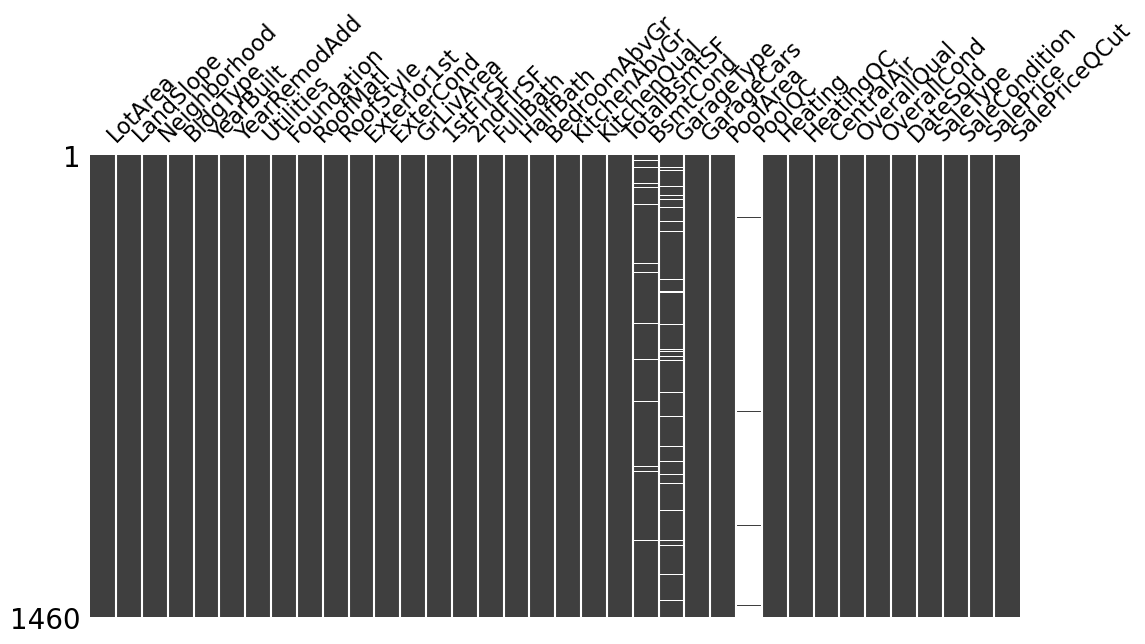

In [39]:
import matplotlib.pyplot as plt
import missingno as msno

fig, ax = plt.subplots(figsize=[12, 6])

# se genera matriz con valores faltantes, espacios en blanco indican valores nulos
msno.matrix(df, ax=ax, sparkline=False)

Esta visualización muestra que exiten columnas practicamente sin información, según la agregación anterior, estas corresponden a `PoolQC` (Calidad de la piscina), `GarageType` (Tipo de garaje) y `BsmtCond` (Condición del sótano).

Por medio de **correlaciones entre valores faltantes**, es posible obtener un análisis bivariado análogo al anteriormente generado. Para ello se puede utilizar un mapa de calor.


In [40]:
null_vars = ["PoolQC", "GarageType", "BsmtCond"] # filtro a variables con nulos
df_null = df[null_vars].applymap(lambda x: 1 if pd.isnull(x) else 0) # 1 si es nulo, 0 si no
df_null

/var/folders/g7/b0fj7ks52l1b_tly3cn3btwh0000gn/T/ipykernel_23462/1078959910.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,PoolQC,GarageType,BsmtCond
Id,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
1456,1,0,0
1457,1,0,0
1458,1,0,0


In [41]:
px.imshow(
    df_null.corr(),
    aspect="16:9",
    title="Correlación entre Variables",
    height=800,
    zmin=-1,
    color_continuous_midpoint=0,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Este gráfico muestra correlaciones de nulidad entre pares de variables, estas varian desde -1 a 1, donde

- $-1$ significa que las variables son excluyentes, es decir, la aparición de una hace que la otra este ausente.
- $1$ corresponde inclusión, esto quiere decir, que la aparición de una hace que la otra aparezca. 
- Valores cercanos a 0 (sin valor numérico en el gráfico) indican ausencia de relación de nulidad entre las variables.

En el gráfico recien generado, no se observa una relación fuerte en la nulidad de las variables.

> **Pregunta ❓**: ¿Qué hacemos con las columnas con datos faltantes?
